Your FIFA project goes here:

### EQUIPO 3: INÉS, CRISTINA G Y CRISTINA A

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Pickle

In [2]:
import pickle
a = {'hello' : 'world'}

In [3]:
with open('filename.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
with open ('filename.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [5]:
print(a == b)

True


### Presentación de data

In [6]:
data = pd.read_csv("./file_for_project/fifa21_training.csv")

In [7]:
data.head(2)

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77


In [8]:
data.columns=[e.lower().replace(' ', '_') for e in data.columns]
list(data.columns)

['unnamed:_0',
 'id',
 'name',
 'age',
 'nationality',
 'club',
 'bp',
 'position',
 'team_&_contract',
 'height',
 'weight',
 'foot',
 'growth',
 'joined',
 'loan_date_end',
 'value',
 'wage',
 'release_clause',
 'contract',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'goalkeeping',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'total_stats',
 'base_stats',
 'w/f',
 'sm',
 'a/w',
 'd/w',
 'ir',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 'hits',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf'

In [9]:
data.shape

(13700, 102)

## Transformar data - Unidades de medida

#### Lista de cambios a hacer
1. Arreglar aquellas columnas con sumas y estrellas
2. Eliminar las unidades de medida en: altura y peso
3. Cambiar los Nuns por la media
4. Eliminar los valores duplicados

### Part 1 

In [10]:
# Agrupar variables con sumas
col_sumitas = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram','lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb','lcb', 'cb', 'rcb', 'rb', 'gk']

In [11]:
def sep_columns(df, columns):
    return pd.concat([df[e].str.split('[ + ]', expand=True).rename(columns={0 : e, 1: e + '1'}) for e in columns], axis=1)

In [12]:
data2 = sep_columns(data, col_sumitas)

In [13]:
# Variable con sumas
data.drop(col_sumitas, axis=1, inplace=True)
data = pd.concat([data, data2], axis=1)
data2.columns

Index(['ls', 'ls1', 'st', 'st1', 'rs', 'rs1', 'lw', 'lw1', 'lf', 'lf1', 'cf',
       'cf1', 'rf', 'rf1', 'rw', 'rw1', 'lam', 'lam1', 'cam', 'cam1', 'ram',
       'ram1', 'lm', 'lm1', 'lcm', 'lcm1', 'cm', 'cm1', 'rcm', 'rcm1', 'rm',
       'rm1', 'lwb', 'lwb1', 'ldm', 'ldm1', 'cdm', 'cdm1', 'rdm', 'rdm1',
       'rwb', 'rwb1', 'lb', 'lb1', 'lcb', 'lcb1', 'cb', 'cb1', 'rcb', 'rcb1',
       'rb', 'rb1', 'gk', 'gk1'],
      dtype='object')

### Variables con estrellas

In [14]:
def converse(df, columns) :
    return pd.concat([df[e].str.split('[ ★ ]', expand=True).rename(columns={0 : e}) for e in columns], axis=1)

In [15]:
col_estrellas = ['w/f', 'sm', 'ir']

In [16]:
data2 = converse(data, col_estrellas)

In [17]:
data2.head(2)

,w/f,1,2,sm,1,ir,1,2
0,4,,,2,,1,,
1,3,,,4,,2,,


In [18]:
data2.drop([1, 2], axis=1, inplace=True)

In [19]:
data.drop(col_estrellas, axis=1, inplace=True)

In [20]:
data = pd.concat([data, data2], axis=1)

In [21]:
pd.set_option("display.max_columns", None)

In [22]:
data.head(2)

,unnamed:_0,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,a/w,d/w,pac,sho,pas,dri,def,phy,hits,ova,ls,ls1,st,st1,rs,rs1,lw,lw1,lf,lf1,cf,cf1,rf,rf1,rw,rw1,lam,lam1,cam,cam1,ram,ram1,lm,lm1,lcm,lcm1,cm,cm1,rcm,rcm1,rm,rm1,lwb,lwb1,ldm,ldm1,cdm,cdm1,rdm,rdm1,rwb,rwb1,lb,lb1,lcb,lcb1,cb,cb1,rcb,rcb1,rb,rb1,gk,gk1,w/f,sm,ir
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,High,Medium,69,51,63,63,51,60,3,64,58,1,58,1,58,1,61,0,62,0,62,0,62,0,61,0,63,1,63,1,63,1,63,1,63,1,63,1,63,1,63,1,59,1,59,1,59,1,59,1,59,1,58,1,54,1,54,1,54,1,58,1,15,1,4,2,1
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,High,Low,83,75,68,82,33,71,44,77,77,0,77,0,77,0,77,0,77,0,77,0,77,0,77,0,76,1,76,1,76,1,76,1,68,2,68,2,68,2,76,1,57,2,53,2,53,2,53,2,57,2,53,2,48,2,48,2,48,2,53,2,18,2,3,4,2


In [23]:
# Transformación de columnas de altura y peso

#### Altura

In [24]:
def transform_height(c):
    return float (c.split('\'')[0]) * 12 + float(c.split('\'')[1][:-1])


In [25]:
data['height'] = list(map(transform_height, data['height']))

In [26]:
data.head(2)

,unnamed:_0,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,a/w,d/w,pac,sho,pas,dri,def,phy,hits,ova,ls,ls1,st,st1,rs,rs1,lw,lw1,lf,lf1,cf,cf1,rf,rf1,rw,rw1,lam,lam1,cam,cam1,ram,ram1,lm,lm1,lcm,lcm1,cm,cm1,rcm,rcm1,rm,rm1,lwb,lwb1,ldm,ldm1,cdm,cdm1,rdm,rdm1,rwb,rwb1,lb,lb1,lcb,lcb1,cb,cb1,rcb,rcb1,rb,rb1,gk,gk1,w/f,sm,ir
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,69.0,161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,High,Medium,69,51,63,63,51,60,3,64,58,1,58,1,58,1,61,0,62,0,62,0,62,0,61,0,63,1,63,1,63,1,63,1,63,1,63,1,63,1,63,1,59,1,59,1,59,1,59,1,59,1,58,1,54,1,54,1,54,1,58,1,15,1,4,2,1
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",72.0,159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,High,Low,83,75,68,82,33,71,44,77,77,0,77,0,77,0,77,0,77,0,77,0,77,0,77,0,76,1,76,1,76,1,76,1,68,2,68,2,68,2,76,1,57,2,53,2,53,2,53,2,57,2,53,2,48,2,48,2,48,2,53,2,18,2,3,4,2


#### Peso

In [27]:
def split_lbs(c):
    c = int(c.split('lbs')[0])
    return c

In [28]:
data['weight'] = list(map(split_lbs, data['weight']))

### NAN

In [29]:
pd.set_option("display.max_rows", None)

In [30]:
data.drop('loan_date_end', axis=1, inplace=True)

In [31]:
col_muchoNaN = ('club', 'position', 'joined', 'volleys', 'curve', 'agility', 'balance', 'jumping', 'vision', 'composture', 'sliding_tackle', 'a/w', 'd/w')

In [32]:
data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))
data.head(2)

,unnamed:_0,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,a/w,d/w,pac,sho,pas,dri,def,phy,hits,ova,ls,ls1,st,st1,rs,rs1,lw,lw1,lf,lf1,cf,cf1,rf,rf1,rw,rw1,lam,lam1,cam,cam1,ram,ram1,lm,lm1,lcm,lcm1,cm,cm1,rcm,rcm1,rm,rm1,lwb,lwb1,ldm,ldm1,cdm,cdm1,rdm,rdm1,rwb,rwb1,lb,lb1,lcb,lcb1,cb,cb1,rcb,rcb1,rb,rb1,gk,gk1,w/f,sm,ir
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,69.0,161,Right,1,"Jul 1, 2015",€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,High,Medium,69,51,63,63,51,60,3,64,58,1,58,1,58,1,61,0,62,0,62,0,62,0,61,0,63,1,63,1,63,1,63,1,63,1,63,1,63,1,63,1,59,1,59,1,59,1,59,1,59,1,58,1,54,1,54,1,54,1,58,1,15,1,4,2,1
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",72.0,159,Right,0,"Jan 16, 2015",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,High,Low,83,75,68,82,33,71,44,77,77,0,77,0,77,0,77,0,77,0,77,0,77,0,77,0,76,1,76,1,76,1,76,1,68,2,68,2,68,2,76,1,57,2,53,2,53,2,53,2,57,2,53,2,48,2,48,2,48,2,53,2,18,2,3,4,2


## Limpiar Money

In [33]:
def transformar_formato_dinero(dinero_mal_formateado):
    ultimo = dinero_mal_formateado[-1]
    parte_izq = dinero_mal_formateado[1:-1]
    if ultimo == "M":
        res = float(parte_izq) * 10**6
    elif ultimo == "K": 
        res = float(parte_izq) * 10**3
    else: 
        res = float(dinero_mal_formateado[1:])
    return res

In [34]:
data['value'] = list(map(transformar_formato_dinero, data ['value']))

In [35]:
data['wage'] = list(map(transformar_formato_dinero, data ['wage']))

In [36]:
data['release_clause'] = list(map(transformar_formato_dinero, data ['release_clause']))

## Duplicados

In [37]:
data.duplicated().sum()

0

In [38]:
data = data.drop_duplicates()

In [39]:
print (data.shape)

(13700, 128)


In [40]:
data.duplicated().sum()

0

In [41]:
data = data.drop_duplicates()

In [42]:
print (data.shape)

(13700, 128)


In [43]:
data.head(2)

,unnamed:_0,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,a/w,d/w,pac,sho,pas,dri,def,phy,hits,ova,ls,ls1,st,st1,rs,rs1,lw,lw1,lf,lf1,cf,cf1,rf,rf1,rw,rw1,lam,lam1,cam,cam1,ram,ram1,lm,lm1,lcm,lcm1,cm,cm1,rcm,rcm1,rm,rm1,lwb,lwb1,ldm,ldm1,cdm,cdm1,rdm,rdm1,rwb,rwb1,lb,lb1,lcb,lcb1,cb,cb1,rcb,rcb1,rb,rb1,gk,gk1,w/f,sm,ir
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,69.0,161,Right,1,"Jul 1, 2015",525000.0,4000.0,801000.0,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,High,Medium,69,51,63,63,51,60,3,64,58,1,58,1,58,1,61,0,62,0,62,0,62,0,61,0,63,1,63,1,63,1,63,1,63,1,63,1,63,1,63,1,59,1,59,1,59,1,59,1,59,1,58,1,54,1,54,1,54,1,58,1,15,1,4,2,1
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",72.0,159,Right,0,"Jan 16, 2015",8500000.0,23000.0,0.0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,High,Low,83,75,68,82,33,71,44,77,77,0,77,0,77,0,77,0,77,0,77,0,77,0,77,0,76,1,76,1,76,1,76,1,68,2,68,2,68,2,76,1,57,2,53,2,53,2,53,2,57,2,53,2,48,2,48,2,48,2,53,2,18,2,3,4,2


##### Segunda limpieza de variables para mejorar el modelo

In [44]:
data.drop(['unnamed:_0', 'id', 'name', 'nationality', 'club', 'team_&_contract', 'joined', 'total_stats', 'mentality', 'release_clause', 'contract', 'foot', 'curve', 'shot_power', 'movement', 'position', 'composure', 'base_stats'], axis=1, inplace=True)

In [45]:
data.head(2)

,age,bp,height,weight,growth,value,wage,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,fk_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,a/w,d/w,pac,sho,pas,dri,def,phy,hits,ova,ls,ls1,st,st1,rs,rs1,lw,lw1,lf,lf1,cf,cf1,rf,rf1,rw,rw1,lam,lam1,cam,cam1,ram,ram1,lm,lm1,lcm,lcm1,cm,cm1,rcm,rcm1,rm,rm1,lwb,lwb1,ldm,ldm1,cdm,cdm1,rdm,rdm1,rwb,rwb1,lb,lb1,lcb,lcb1,cb,cb1,rcb,rcb1,rb,rb1,gk,gk1,w/f,sm,ir
0,26,CM,69.0,161,1,525000.0,4000.0,258,54,47,43,70,44.0,286,61,55,63,63,64,73,61.0,66,82.0,306,73.0,71,55,45,54,52.0,62.0,68.0,54,148,49,56,43.0,48,7,12,14,9,6,High,Medium,69,51,63,63,51,60,3,64,58,1,58,1,58,1,61,0,62,0,62,0,62,0,61,0,63,1,63,1,63,1,63,1,63,1,63,1,63,1,63,1,59,1,59,1,59,1,59,1,59,1,58,1,54,1,54,1,54,1,58,1,15,1,4,2,1
1,30,ST,72.0,159,0,8500000.0,23000.0,365,66,79,76,68,76.0,375,83,72,63,79,83,83,88.0,75,75.0,372,81.0,75,74,68,54,33.0,78.0,72.0,76,77,35,20,22.0,55,11,7,14,7,16,High,Low,83,75,68,82,33,71,44,77,77,0,77,0,77,0,77,0,77,0,77,0,77,0,77,0,76,1,76,1,76,1,76,1,68,2,68,2,68,2,76,1,57,2,53,2,53,2,53,2,57,2,53,2,48,2,48,2,48,2,53,2,18,2,3,4,2


### Unique

In [46]:
for c in data.columns.tolist():        
    print(c, len(data[c].unique()))

age 29
bp 15
height 21
weight 55
growth 28
value 210
wage 142
attacking 359
crossing 89
finishing 92
heading_accuracy 89
short_passing 85
volleys 87
skill 386
dribbling 91
fk_accuracy 89
long_passing 84
ball_control 90
acceleration 86
sprint_speed 85
agility 81
reactions 69
balance 80
power 286
jumping 72
stamina 86
strength 77
long_shots 90
aggression 88
interceptions 89
positioning 95
vision 85
penalties 87
defending 247
marking 91
standing_tackle 85
sliding_tackle 84
goalkeeping 258
gk_diving 70
gk_handling 72
gk_kicking 80
gk_positioning 78
gk_reflexes 74
a/w 3
d/w 3
pac 71
sho 76
pas 67
dri 67
def 78
phy 66
hits 482
ova 50
ls 75
ls1 9
st 75
st1 9
rs 75
rs1 9
lw 78
lw1 9
lf 77
lf1 8
cf 77
cf1 8
rf 77
rf1 8
rw 78
rw1 9
lam 77
lam1 9
cam 77
cam1 9
ram 77
ram1 9
lm 77
lm1 9
lcm 74
lcm1 7
cm 74
cm1 7
rcm 74
rcm1 7
rm 77
rm1 9
lwb 72
lwb1 7
ldm 71
ldm1 9
cdm 71
cdm1 9
rdm 71
rdm1 9
rwb 72
rwb1 7
lb 70
lb1 7
lcb 73
lcb1 11
cb 73
cb1 11
rcb 73
rcb1 11
rb 70
rb1 7
gk 66
gk1 4
w/f 5
sm 5
ir

## Encoding

In [47]:
cat_cols = data.select_dtypes(object).columns
cat_cols

Index(['bp', 'a/w', 'd/w', 'hits', 'ls', 'ls1', 'st', 'st1', 'rs', 'rs1', 'lw',
       'lw1', 'lf', 'lf1', 'cf', 'cf1', 'rf', 'rf1', 'rw', 'rw1', 'lam',
       'lam1', 'cam', 'cam1', 'ram', 'ram1', 'lm', 'lm1', 'lcm', 'lcm1', 'cm',
       'cm1', 'rcm', 'rcm1', 'rm', 'rm1', 'lwb', 'lwb1', 'ldm', 'ldm1', 'cdm',
       'cdm1', 'rdm', 'rdm1', 'rwb', 'rwb1', 'lb', 'lb1', 'lcb', 'lcb1', 'cb',
       'cb1', 'rcb', 'rcb1', 'rb', 'rb1', 'gk', 'gk1', 'w/f', 'sm', 'ir'],
      dtype='object')

### Dummies-> Binomiales

In [48]:
one_hot_data = pd.get_dummies(data[cat_cols], drop_first=True) 
one_hot_data.head(2)

,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium,hits_1.2K,hits_1.3K,hits_1.4K,hits_1.5K,hits_1.6K,hits_1.7K,hits_1.8K,hits_1.9K,hits_10,hits_100,hits_101,hits_102,hits_103,hits_104,hits_105,hits_106,hits_107,hits_108,hits_109,hits_11,hits_110,hits_111,hits_112,hits_113,hits_114,hits_115,hits_116,hits_117,hits_118,hits_119,hits_12,hits_120,hits_122,hits_123,hits_124,hits_125,hits_127,hits_128,hits_129,hits_13,hits_130,hits_131,hits_132,hits_133,hits_134,hits_135,hits_136,hits_137,hits_138,hits_139,hits_14,hits_140,hits_141,hits_142,hits_143,hits_144,hits_145,hits_146,hits_147,hits_148,hits_149,hits_15,hits_150,hits_151,hits_152,hits_153,hits_154,hits_155,hits_156,hits_157,hits_158,hits_159,hits_16,hits_160,hits_161,hits_162,hits_163,hits_164,hits_165,hits_166,hits_167,hits_169,hits_17,hits_170,hits_171,hits_172,hits_173,hits_174,hits_175,hits_177,hits_178,hits_179,hits_18,hits_180,hits_181,hits_182,hits_183,hits_184,hits_185,hits_186,hits_187,hits_188,hits_189,hits_19,hits_190,hits_191,hits_192,hits_193,hits_194,hits_195,hits_196,hits_197,hits_198,hits_199,hits_1K,hits_2.1K,hits_2.2K,hits_2.3K,hits_2.7K,hits_2.8K,hits_2.9K,hits_20,hits_200,hits_201,hits_202,hits_203,hits_204,hits_205,hits_206,hits_208,hits_21,hits_210,hits_211,hits_212,hits_213,hits_214,hits_215,hits_216,hits_217,hits_219,hits_22,hits_220,hits_221,hits_223,hits_224,hits_225,hits_226,hits_227,hits_228,hits_229,hits_23,hits_230,hits_231,hits_232,hits_233,hits_234,hits_235,hits_236,hits_238,hits_239,hits_24,hits_240,hits_241,hits_242,hits_243,hits_245,hits_246,hits_247,hits_249,hits_25,hits_250,hits_252,hits_253,hits_254,hits_256,hits_257,hits_258,hits_259,hits_26,hits_260,hits_261,hits_262,hits_263,hits_264,hits_265,hits_266,hits_268,hits_27,hits_270,hits_271,hits_272,hits_273,hits_274,hits_275,hits_277,hits_278,hits_279,hits_28,hits_280,hits_281,hits_282,hits_284,hits_287,hits_29,hits_290,hits_292,hits_293,hits_294,hits_295,hits_296,hits_297,hits_2K,hits_3,hits_3.3K,hits_3.6K,hits_3.8K,hits_30,hits_300,hits_301,hits_302,hits_303,hits_304,hits_305,hits_306,hits_307,hits_308,hits_309,hits_31,hits_310,hits_311,hits_313,hits_314,hits_315,hits_316,hits_318,hits_32,hits_321,hits_322,hits_324,hits_326,hits_328,hits_33,hits_330,hits_332,hits_334,hits_335,hits_338,hits_34,hits_340,hits_341,hits_342,hits_343,hits_344,hits_345,hits_346,hits_347,hits_349,hits_35,hits_350,hits_352,hits_353,hits_354,hits_357,hits_359,hits_36,hits_360,hits_361,hits_362,hits_363,hits_364,hits_365,hits_366,hits_367,hits_37,hits_370,hits_371,hits_374,hits_377,hits_38,hits_381,hits_382,hits_386,hits_388,hits_389,hits_39,hits_391,hits_393,hits_395,hits_396,hits_3K,hits_4,hits_40,hits_401,hits_402,hits_403,hits_405,hits_406,hits_407,hits_41,hits_410,hits_412,hits_416,hits_417,hits_418,hits_42,hits_420,hits_43,hits_430,hits_431,hits_434,hits_436,hits_437,hits_439,hits_44,hits_440,hits_441,hits_442,hits_445,hits_446,hits_447,hits_448,hits_45,hits_453,hits_455,hits_457,hits_46,hits_460,hits_461,hits_462,hits_466,hits_468,hits_47,hits_472,hits_477,hits_478,hits_479,hits_48,hits_484,hits_487,hits_488,hits_49,hits_491,hits_495,hits_498,hits_5,hits_50,hits_504,hits_508,hits_509,hits_51,hits_511,hits_515,hits_516,hits_519,hits_52,hits_520,hits_524,hits_526,hits_53,hits_535,hits_54,hits_542,hits_545,hits_546,hits_55,hits_552,hits_553,hits_555,hits_556,hits_557,hits_56,hits_562,hits_565,hits_57,hits_571,hits_572,hits_574,hits_58,hits_583,hits_59,hits_594,hits_595,hits_598,hits_5K,hits_6,hits_6.3K,hits_60,hits_600,hits_601,hits_604,hits_608,hits_61,hits_611,hits_615,hits_62,hits_63,hits_632,hits_64,hits_647,hits_649,hits_65,hits_655,hits_66,hits_661,hits_662,hits_663,hits_67,hits_670,hits_672,hits_674,hits_68,hits_683,hits_69,hits_7,hits_70,hits_709,hits_71,hits_715,hits_72,hits_722,hits_724,hits_73,hits_730,hits_738,hits_74,hits_748,hits_75,hits_750,hits_751,hits_76,hits_761,hits_764,hits_77,hits_770,hits_771,hits_772,hits_776,hits_

In [49]:
data = pd.concat([data, one_hot_data], axis=1)   
data.drop(columns=cat_cols, inplace=True)

## Split

In [50]:
datos_interesantes = ['name', 'heading_accuracy', 'short_passing', 'long_passing', 'fk_accuracy', 'ball_control', 'shot_power', 'long_shots', 'gk_handling', 'gk_reflexes']
datos_int = pd.DataFrame (datos_interesantes)

In [51]:
y = data['ova']
X = data.drop('ova', axis=1)

In [52]:
print(X.shape)
print(y.shape)

(13700, 2733)
(13700,)


In [53]:
from sklearn.model_selection import train_test_split as tts

In [54]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
standard = StandardScaler()
X_train_scaled = standard.fit_transform(X_train)
X_test_scaled =  standard.fit_transform(X_test)

## Modeling

### Main Model -> RIDGE!!

In [57]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

from sklearn.metrics import mean_absolute_error

C:\Users\EB725YF\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.921e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [58]:
mean_absolute_error(y_test, y_pred_ridge)

1.17353059766334

In [59]:

R2 = ridge.score(X_test, y_test)

In [60]:
R2

0.9504753620543622

In [61]:
import pickle

In [62]:
with open("modelo_final.pickle", 'wb') as fp:
    pickle.dump(ridge, fp)

In [63]:
import matplotlib.pylab as plt

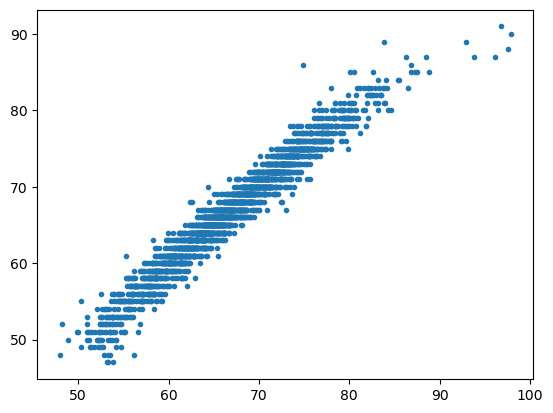

In [64]:
plt.plot(y_pred_ridge, y_test, '.')

### regresion linear

In [65]:
from sklearn.linear_model import LinearRegression as LinReg
linreg = LinReg()    
linreg.fit(X_train, y_train)   
y_pred_linreg=linreg.predict(X_test)

In [66]:
from sklearn.metrics import mean_absolute_error

In [67]:
mean_absolute_error(y_test, y_pred_linreg)

1.2236847652171607

In [68]:
R2 = linreg.score(X_test, y_test)

In [69]:
R2

0.9300726138948007

In [70]:
import matplotlib.pylab as plt

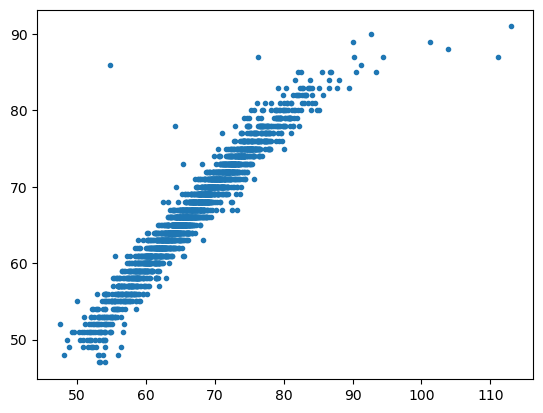

In [71]:
plt.plot(y_pred_linreg, y_test, '.')

In [72]:
datos_interesantes = ['heading_accuracy', 'short_passing', 'long_passing', 'fk_accuracy', 'ball_control', 'power', 'long_shots', 'gk_handling', 'gk_reflexes']
# datos_int = pd.DataFrame (datos_interesantes)

In [73]:
datos_interesantes[2] in data.columns

True

In [74]:
datos_int = data[datos_interesantes]

In [75]:
datos_int.head(2)

,heading_accuracy,short_passing,long_passing,fk_accuracy,ball_control,power,long_shots,gk_handling,gk_reflexes
0,43,70,63,55,63,306,45,12,6
1,76,68,63,72,79,372,68,7,16


In [76]:
import numpy as np 
corr=datos_int.corr()      
mask=np.triu(np.ones_like(corr, dtype=np.bool)) 


C:\Users\EB725YF\AppData\Local\Temp\ipykernel_10576\1196902626.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(corr, dtype=np.bool))


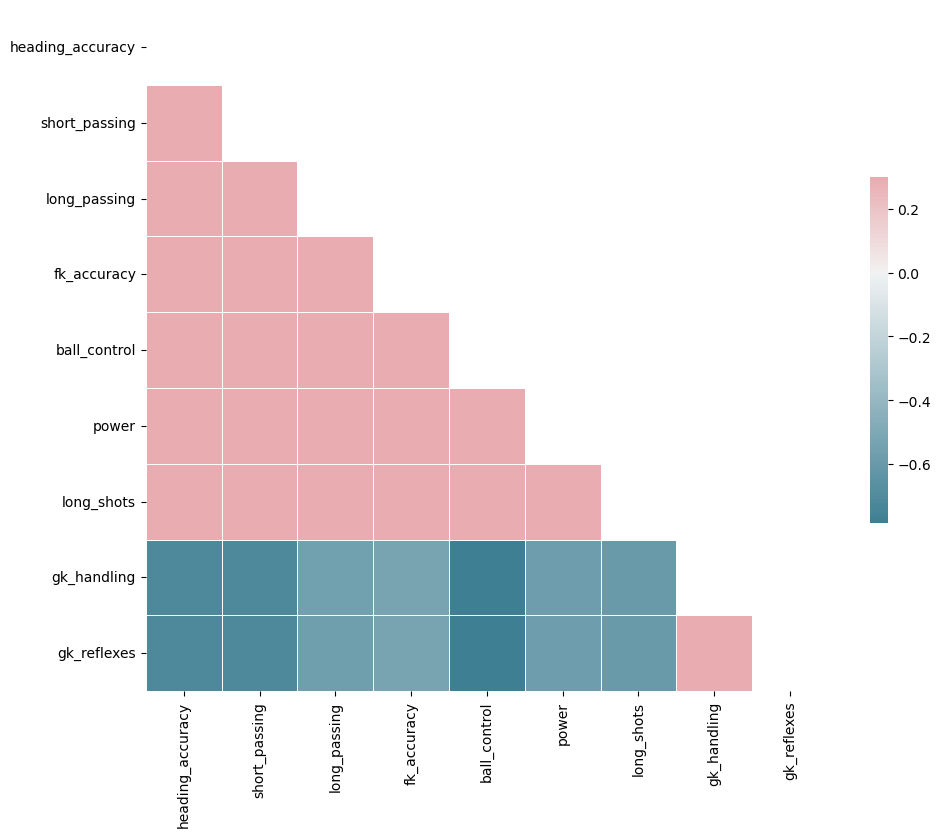

In [77]:
f, ax=plt.subplots(figsize=(11, 9))                 
cmap=sns.diverging_palette(220, 10, as_cmap=True) 
sns.heatmap(corr, mask=mask, cmap=cmap,             
            vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5});


#### Resultado de gráfica

Correlaciones de variables en las que se basa la formula de OVA

## Regularizaciones

### Lasso L1

In [78]:
from sklearn.linear_model import Lasso       
from sklearn.linear_model import Ridge       
from sklearn.linear_model import ElasticNet  

In [79]:
lasso=Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

### Ridge L2

In [80]:
ridge=Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

C:\Users\EB725YF\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.921e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


### ElasticNet L1+L2

In [81]:
elastic=ElasticNet()
elastic.fit(X_train, y_train)

y_pred_elastic = elastic.predict(X_test)

####  Definir los modelos por analizar según sus errores cuantitativos

In [82]:
models=[linreg, lasso, ridge, elastic]
model_names=['linreg', 'lasso', 'ridge', 'elastic']
preds=[y_pred_linreg, y_pred_lasso, y_pred_ridge, y_pred_elastic]


### MSE

In [83]:
from sklearn.metrics import mean_squared_error as mse

In [84]:
for i in range(len(models)):

    train_mse=mse(models[i].predict(X_train), y_train) 
    test_mse=mse(preds[i], y_test)

    print ('Model: {}, train MSE: {} -- test MSE: {}'.format(model_names[i], train_mse, test_mse))

Model: linreg, train MSE: 1.6365482533131896 -- test MSE: 3.4759545154917144
Model: lasso, train MSE: 5.125429908865066 -- test MSE: 5.459727714656732
Model: ridge, train MSE: 1.7298005314655978 -- test MSE: 2.4617735408592996
Model: elastic, train MSE: 4.873484543809849 -- test MSE: 5.142890160886983


### RMSE

In [85]:
for i in range(len(models)):

    train_rmse=mse(models[i].predict(X_train), y_train)**0.5 
    test_rmse=mse(preds[i], y_test)**0.5

    print ('Model: {}, train RMSE: {} -- test RMSE: {}'.format(model_names[i], train_rmse, test_rmse))

Model: linreg, train RMSE: 1.279276456952597 -- test RMSE: 1.864391191647213
Model: lasso, train RMSE: 2.26394123352729 -- test RMSE: 2.3366060246983724
Model: ridge, train RMSE: 1.3152188150515478 -- test RMSE: 1.5690039964446552
Model: elastic, train RMSE: 2.2075970066590163 -- test RMSE: 2.2677941178349905


### MAE

In [86]:
from sklearn.metrics import mean_absolute_error as mae
for i in range(len(models)):
    train_mae=mae(models[i].predict(X_train), y_train) 
    test_mae=mae(preds[i], y_test)

    print ('Model: {}, train MAE: {} -- test MAE: {}'.format(model_names[i], train_mae, test_mae))

Model: linreg, train MAE: 0.966294635043941 -- test MAE: 1.2236847652171607
Model: lasso, train MAE: 1.742392309123741 -- test MAE: 1.8025091690469297
Model: ridge, train MAE: 1.0059241595414097 -- test MAE: 1.17353059766334
Model: elastic, train MAE: 1.6971310441864722 -- test MAE: 1.7486423841526941


## R2

In [87]:
for i in range(len(models)):
   train_score=models[i].score(X_train, y_train) #R2
    test_score=models[i].score(X_test, y_test)
   print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))

IndentationError: unexpected indent (3096625628.py, line 3)

### FAZIT:
    
Tras haber limpiado los datos y haber filtrado las variables/columnas del Data Frame original, hemos aplicado una regresión Ridge por considerar que es la más adecuada para modelar nuestras variables ya limpiadas. Con ello hemos conseguido alcanzar una cifra de 0.95 en el estadístico R2.

